In [3]:
import pandas as pd

In [4]:
goals = pd.read_excel("MorytoGoals.xlsx")

In [5]:
goals.head(5)

,Season Nu,Season,Goals,Goals Total
0,1,2015/2016,0,0
1,2,2016/2017,160,160
2,3,2017/2018,227,387
3,4,2018/2019,173,560
4,5,2019/2020,127,687


In [6]:
for i in range(0, len(goals)):
    goals.loc[i, 'Season Nu'] = goals.loc[i, 'Season Nu'] - 1

In [7]:
goals.head(5)

,Season Nu,Season,Goals,Goals Total
0,0,2015/2016,0,0
1,1,2016/2017,160,160
2,2,2017/2018,227,387
3,3,2018/2019,173,560
4,4,2019/2020,127,687


In [8]:
from matplotlib import pyplot as plt

In [9]:
season = goals['Season Nu']
goals = goals['Goals Total']

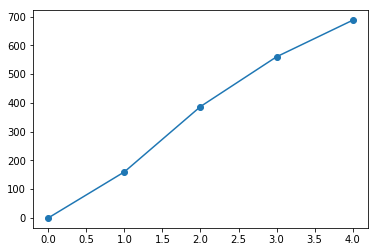

In [10]:
plt.plot(season, goals, marker='o')

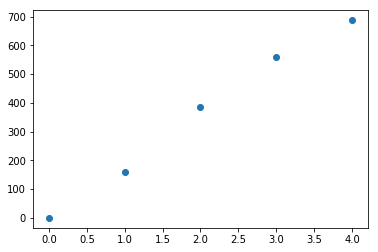

In [11]:
plt.scatter(season, goals, marker='o')

In [12]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [13]:
plt.style.use('fivethirtyeight')

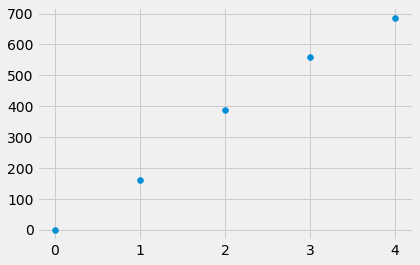

In [14]:
plt.scatter(season, goals, marker='o')

In [15]:
plt.xkcd()

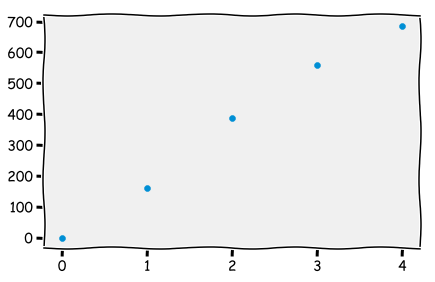

In [16]:
plt.scatter(season, goals, marker='o')

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [18]:
x = np.array(season).reshape((-1, 1))
y = np.array(goals)

In [19]:
x

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [20]:
model = LinearRegression()

In [21]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
model.score(x, y)

0.9919836293557022

In [23]:
model.intercept_

4.000000000000057

In [24]:
model.coef_

array([177.4])

In [25]:
model.predict(x)

array([  4. , 181.4, 358.8, 536.2, 713.6])

In [26]:
x_to_predict = np.array([5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)

In [27]:
x_to_predict

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [28]:
model.predict(x_to_predict)

array([ 891. , 1068.4, 1245.8, 1423.2, 1600.6, 1778. , 1955.4])

In [29]:
predicted_values = model.predict(x_to_predict)
predicted_values = list(predicted_values)
predicted_values

[891.0,
 1068.3999999999999,
 1245.7999999999997,
 1423.1999999999998,
 1600.6,
 1777.9999999999998,
 1955.3999999999996]

In [30]:
df_to_add = pd.DataFrame({'Season Nu': [5, 6, 7, 8, 9, 10, 11], 
                          'Season': ['2020/2021', '2021/2022', '2022/2023', '2023/2024', '2024/2025', '2025/2026', '2026/2027'],
                          'Goals Total': predicted_values})

In [31]:
df_to_add

,Season Nu,Season,Goals Total
0,5,2020/2021,891.0
1,6,2021/2022,1068.4
2,7,2022/2023,1245.8
3,8,2023/2024,1423.2
4,9,2024/2025,1600.6
5,10,2025/2026,1778.0
6,11,2026/2027,1955.4


In [32]:
all_seasons = pd.concat([goals, df_to_add], ignore_index=True)

C:\Users\Slawek\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [33]:
goals_real = pd.read_excel("MorytoGoals.xlsx")

In [34]:
for i in range(0, len(goals_real)):
    goals_real.loc[i, 'Season Nu'] = goals_real.loc[i, 'Season Nu'] - 1

In [35]:
all_seasons = pd.concat([goals_real, df_to_add], ignore_index=True)

C:\Users\Slawek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
all_seasons

,Goals,Goals Total,Season,Season Nu
0,0.0,0.0,2015/2016,0
1,160.0,160.0,2016/2017,1
2,227.0,387.0,2017/2018,2
3,173.0,560.0,2018/2019,3
4,127.0,687.0,2019/2020,4
5,NaN,891.0,2020/2021,5
6,NaN,1068.4,2021/2022,6
7,NaN,1245.8,2022/2023,7
8,NaN,1423.2,2023/2024,8
9,NaN,1600.6,2024/2025,9


In [37]:
all_seasons = all_seasons.round({'Goals Total': 0})

In [38]:
all_seasons

,Goals,Goals Total,Season,Season Nu
0,0.0,0.0,2015/2016,0
1,160.0,160.0,2016/2017,1
2,227.0,387.0,2017/2018,2
3,173.0,560.0,2018/2019,3
4,127.0,687.0,2019/2020,4
5,NaN,891.0,2020/2021,5
6,NaN,1068.0,2021/2022,6
7,NaN,1246.0,2022/2023,7
8,NaN,1423.0,2023/2024,8
9,NaN,1601.0,2024/2025,9


In [39]:
for i in range(5, len(all_seasons)):
    all_seasons.loc[i, 'Goals'] = all_seasons.loc[i, 'Goals Total'] - all_seasons.loc[i-1, 'Goals Total']

In [40]:
all_seasons

,Goals,Goals Total,Season,Season Nu
0,0.0,0.0,2015/2016,0
1,160.0,160.0,2016/2017,1
2,227.0,387.0,2017/2018,2
3,173.0,560.0,2018/2019,3
4,127.0,687.0,2019/2020,4
5,204.0,891.0,2020/2021,5
6,177.0,1068.0,2021/2022,6
7,178.0,1246.0,2022/2023,7
8,177.0,1423.0,2023/2024,8
9,178.0,1601.0,2024/2025,9


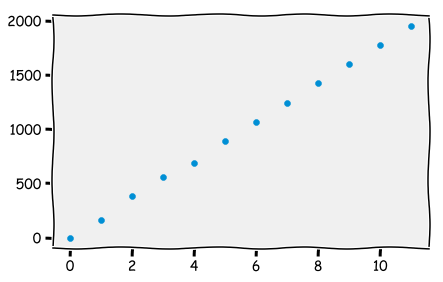

In [41]:
season = all_seasons['Season Nu']
goals = all_seasons['Goals Total']
plt.scatter(season, goals, marker='o')

In [42]:
del x

In [43]:
x_regression = np.linspace(0, 11, 100)
y_regression = float(model.coef_) * x_regression + model.intercept_

In [44]:
float(model.coef_)

177.39999999999998

In [45]:
model.intercept_

4.000000000000057

In [46]:
y_regression

array([   4.        ,   23.71111111,   43.42222222,   63.13333333,
         82.84444444,  102.55555556,  122.26666667,  141.97777778,
        161.68888889,  181.4       ,  201.11111111,  220.82222222,
        240.53333333,  260.24444444,  279.95555556,  299.66666667,
        319.37777778,  339.08888889,  358.8       ,  378.51111111,
        398.22222222,  417.93333333,  437.64444444,  457.35555556,
        477.06666667,  496.77777778,  516.48888889,  536.2       ,
        555.91111111,  575.62222222,  595.33333333,  615.04444444,
        634.75555556,  654.46666667,  674.17777778,  693.88888889,
        713.6       ,  733.31111111,  753.02222222,  772.73333333,
        792.44444444,  812.15555556,  831.86666667,  851.57777778,
        871.28888889,  891.        ,  910.71111111,  930.42222222,
        950.13333333,  969.84444444,  989.55555556, 1009.26666667,
       1028.97777778, 1048.68888889, 1068.4       , 1088.11111111,
       1107.82222222, 1127.53333333, 1147.24444444, 1166.95555

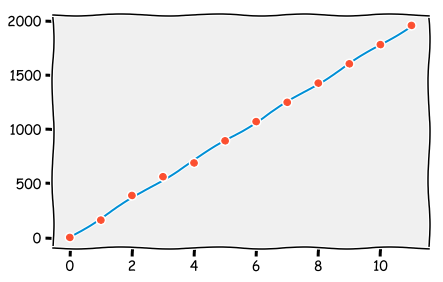

In [47]:
plt.plot(x_regression, y_regression)
plt.plot(season, goals, marker='o', linestyle='None')

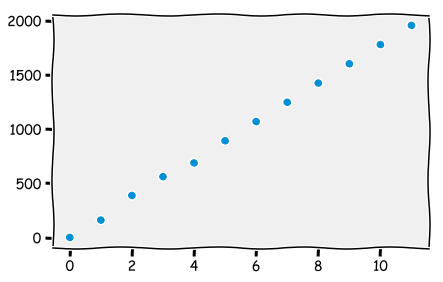

In [48]:
ax = plt.subplot()
plt.plot(season, goals, marker='o', linestyle='None')
plt.show()

In [49]:
plt.style.use('ggplot')

In [50]:
plt.xkcd(False)

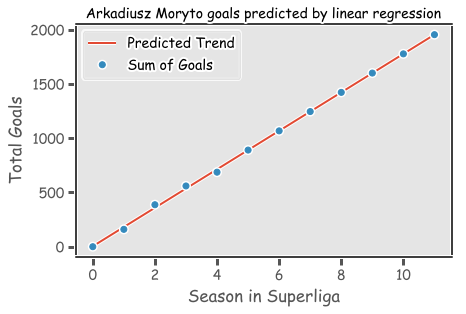

In [51]:
plt.plot(x_regression, y_regression, label='Predicted Trend')
plt.plot(season, goals, marker='o', linestyle='None', label='Sum of Goals')
plt.legend()
plt.title('Arkadiusz Moryto goals predicted by linear regression', fontsize='medium')
plt.xlabel('Season in Superliga')
plt.ylabel('Total Goals')
plt.savefig('Arek Moryto Goals.png')

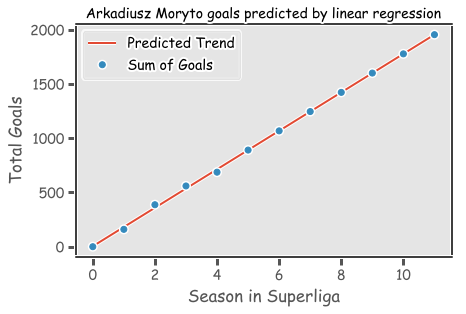

In [52]:
plt.tight_layout()
plt.plot(x_regression, y_regression, label='Predicted Trend')
plt.plot(season, goals, marker='o', linestyle='None', label='Sum of Goals')
plt.legend()
plt.title('Arkadiusz Moryto goals predicted by linear regression', fontsize='medium')
plt.xlabel('Season in Superliga')
plt.ylabel('Total Goals')
plt.savefig('Arek Moryto Goals.png')